# CARD:Live Dashboard Data and API tutorial

Welcome to the CARD:Live Dashboard API tutorial. This will show you how to download the results JSON files used by [CARD:Live](https://card.mcmaster.ca/live) and convert to a Python/Pandas DataFrame for custom data analysis.

## Dependencies

You will have to have installed the `card-live-dashboard` Python package as well as `matplotlib` like below:

```bash
python -m pip install card-live-dashboard matplotlib
```

I use matplotlib here for plotting (rather than plotly) since it's easier to integrate into Juptyer.

Let's check the version of the package we are using:

In [1]:
import card_live_dashboard
print(card_live_dashboard.__version__)

0.5.0


# Download data

The first step is to download a copy of the data. This can be directly downloaded from the main CARD:Live dashboard (<https://bergen.mcmaster.ca/cardlive>), however it's easier to run the `card-live-dash-init` command to setup a new home directory for the CARD:Live dashboard, which will download the current data as well as setup an NCBI taxonomic database for later.

In [25]:
!card-live-dash-init card-live-home

Initalizing CARD:Live home directory as [card-live-home]
Loaded 3061 samples into [card-live-home/data/card_live]
Writing example configurations to [card-live-home/config]
Initializing NCBI Taxonomy database in [card-live-home/db]
Done. Parsing...
Loading node names...
2293283 names loaded.
232616 synonyms loaded.
Loading nodes...
2293283 nodes loaded.
Linking nodes...
Tree is loaded.
Updating database: card-live-home/db/taxa.sqlite ...
 2293000 generating entries... 
Uploading to card-live-home/db/taxa.sqlite

Inserting synonyms:      230000 
Inserting taxid merges:  60000 
Inserting taxids:       2290000 
Finished initializing CARD:Live home directory as [card-live-home]
Please add CARD:Live JSON data to [card-live-home/data/card_live] and start the CARD:Live dashboard by running "card-live-dash-prod card-live-home"


The data will be in the directory `card-live-home/data/card_live`, which is a directory of JSON-formmated files containing the results of RGI/MLST/LMAT run on the different genomes. Let's take a quick look at one of these files:

In [26]:
!python -m json.tool card-live-home/data/card_live/ffa57d033d9e5f4d3b191c4eae8c75ca | head

{
    "rgi_main": [
        {
            "ORF_ID": 1,
            "Cut_Off": "Strict",
            "Pass_Bitscore": "450",
            "Best_Hit_Bitscore": "452.2",
            "Best_Hit_ARO": "OXA-405",
            "Best_Identities": "80.37",
            "ARO": "3001596",


# Construct Dataframes

To construct pandas Dataframes from these JSON files we can use part of the `card-live-dashboard` API. Specifically the [CardLiveDataLoader](https://github.com/arpcard/card-live-dashboard/blob/main/card_live_dashboard/service/CardLiveDataLoader.py) class, which will generate a [CardLiveData](https://github.com/arpcard/card-live-dashboard/blob/main/card_live_dashboard/model/CardLiveData.py) object containing JSON results as separate dataframes.

Let's convert the data now (note this may take a few minutes to load all the JSON files).

In [27]:
from pathlib import Path

from card_live_dashboard.service.CardLiveDataLoader import CardLiveDataLoader

data_dir = Path('card-live-home/data/card_live')
loader = CardLiveDataLoader(data_dir)
data = loader.read_data()
data.main_df.head(5)

,timestamp,geo_area_code,geo_area_name,mlst_version,lmat_version,rgi_version,card_data_version,variants_data_version,analysis_valid
filename,,,,,,,,,
000e7e4842e3880db69532c0578e1960,2020-08-31 09:56:48.521536,35,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all
003b60af692d11a14f10223d303a352f,2020-09-08 07:37:23.142951,-1,N/A,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,mlst and lmat
003f7bbe769852d8a171865081ba1bc3,2020-08-10 16:56:26.607290,34,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all
0044d0a1783629ef652c8e8232d76b58,2020-08-10 14:02:57.663503,34,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all
0070cced7fef29dd8c43e68c417458d4,2020-09-15 16:39:58.648231,21,Northern America,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all


Awesome, we've loaded the data up into separate dataframes. The dataframe displayed above is `main_df` and contains the geographic information, timestamps, and other main information related to each file.

There are four other possible dataframes: `rgi_df`, `rgi_kmer_df`, `lmat_df`, and `mlst_df`. Let's take a look at some of these (note the first few columns are the same among each dataframe).

In [28]:
data.rgi_df.head(5)

,geo_area_name,mlst_version,lmat_version,rgi_version,card_data_version,variants_data_version,analysis_valid,rgi_main.ORF_ID,rgi_main.Cut_Off,rgi_main.Pass_Bitscore,...,rgi_main.Other_SNPs,rgi_main.Drug Class,rgi_main.Resistance Mechanism,rgi_main.AMR Gene Family,rgi_main.CARD_Protein_Sequence,rgi_main.Percentage Length of Reference Sequence,rgi_main.ID,rgi_main.Model_ID,rgi_main.Nudged,rgi_main.Note
filename,,,,,,,,,,,,,,,,,,,,,
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,1.0,Strict,500,...,None,cephalosporin; cephamycin; penam,antibiotic target alteration,Penicillin-binding protein mutations conferrin...,MVKFNSSRKSGKSKKTIRKLTAPETVKQNKPQKVFEKCFMRGRYML...,98.52,gnl|BL_ORD_ID|2560|hsp_num:0,2886,,
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,2.0,Strict,700,...,None,elfamycin antibiotic,antibiotic target alteration,elfamycin resistant EF-Tu,MLSPEGESTIVRNIAVSKEKFERTKPHVNVGTIGHVDHGKTTLTAA...,96.09,gnl|BL_ORD_ID|2022|hsp_num:0,2158,,
003b60af692d11a14f10223d303a352f,N/A,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,mlst and lmat,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003f7bbe769852d8a171865081ba1bc3,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,1.0,Strict,850,...,None,fluoroquinolone antibiotic; acridine dye; tric...,antibiotic efflux,multidrug and toxic compound extrusion (MATE) ...,MSNVTSFRSELKQLFHLMLPILITQFAQAGFGLIDTIMAGHLSAAD...,100.00,gnl|BL_ORD_ID|1284|hsp_num:0,1368,True,loose hit with at least 95 percent identity pu...
003f7bbe769852d8a171865081ba1bc3,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,2.0,Perfect,700,...,None,fosfomycin,antibiotic efflux,major facilitator superfamily (MFS) antibiotic...,MTTTLKKVVAASMVGSVAEWYEFFLYGTASALVFGELFFQQTGNAI...,100.00,gnl|BL_ORD_ID|2769|hsp_num:0,3277,,


In [29]:
data.rgi_kmer_df.head(5)

,geo_area_name,mlst_version,lmat_version,rgi_version,card_data_version,variants_data_version,analysis_valid,rgi_kmer.CARD*kmer Prediction,rgi_kmer.Taxonomic kmers,rgi_kmer.Genomic kmers
filename,,,,,,,,,,
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,Haemophilus influenzae (chromosome),Haemophilus influenzae: 18; Haemophilus: 73;,chr + plasmid: 0; plasmid: 0; chr: 81;
003b60af692d11a14f10223d303a352f,N/A,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,mlst and lmat,NaN,NaN,NaN
003f7bbe769852d8a171865081ba1bc3,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,Acinetobacter baumannii (chromosome),Acinetobacter baumannii: 785; Acinetobacter: 64;,chr + plasmid: 0; plasmid: 0; chr: 1287;
003f7bbe769852d8a171865081ba1bc3,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,Acinetobacter baumannii (chromosome),Acinetobacter baumannii: 458; Acinetobacter: 430;,chr + plasmid: 0; plasmid: 0; chr: 1230;
003f7bbe769852d8a171865081ba1bc3,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,Acinetobacter baumannii (chromosome),Acinetobacter baumannii: 70; Acinetobacter: 200;,chr + plasmid: 0; plasmid: 0; chr: 270;


In [30]:
data.lmat_df.head(5)

,geo_area_name,mlst_version,lmat_version,rgi_version,card_data_version,variants_data_version,analysis_valid,lmat.score,lmat.count,lmat.ncbi_taxon_id,lmat.rank,lmat.taxonomy_label
filename,,,,,,,,,,,,
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,10239.6,6686,747,species,Pasteurella multocida
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,656.063,642,1032869,no rank,Pasteurella multocida subsp. multocida str. An...
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,164.587,115,1169410,no rank,Pasteurella multocida subsp. gallicida X73
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,54.48,52,44283,subspecies,Pasteurella multocida subsp. multocida
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,47.046,22,32630,species,synthetic construct


In [31]:
data.mlst_df.head(5)

,geo_area_name,mlst_version,lmat_version,rgi_version,card_data_version,variants_data_version,analysis_valid,mlst.scheme,mlst.sequence_type,mlst.alleles_1,mlst.alleles_2,mlst.alleles_3,mlst.alleles_4,mlst.alleles_5,mlst.alleles_6,mlst.alleles_7,mlst.alleles_8,mlst.alleles_9,mlst.alleles_10
filename,,,,,,,,,,,,,,,,,,,
000e7e4842e3880db69532c0578e1960,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,pmultocida_rirdc,201,RIRDC_adk(21),RIRDC_est(33),RIRDC_pmi(26),RIRDC_zwf(2),RIRDC_mdh(17),RIRDC_gdh(20),RIRDC_pgi(35),NaN,NaN,NaN
003b60af692d11a14f10223d303a352f,N/A,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,mlst and lmat,None,None,,,,,,,,NaN,NaN,NaN
003f7bbe769852d8a171865081ba1bc3,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,abaumannii_2,2,Pas_cpn60(2),Pas_fusA(2),Pas_gltA(2),Pas_pyrG(2),Pas_recA(2),Pas_rplB(2),Pas_rpoB(2),NaN,NaN,NaN
0044d0a1783629ef652c8e8232d76b58,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,abaumannii_2,149,Pas_cpn60(3),Pas_fusA(12),Pas_gltA(11),Pas_pyrG(2),Pas_recA(14),Pas_rplB(9),Pas_rpoB(14),NaN,NaN,NaN
0070cced7fef29dd8c43e68c417458d4,Northern America,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,ecoli,73,adk(36),fumC(24),gyrB(9),icd(13),mdh(17),purA(11),recA(25),NaN,NaN,NaN


## Dataframes with postprocessed data

Some of the data displayed in CARD:Live is post-processed internally by the application to set standardized geographic region names or taxonomic ranks. This must be all setup before loading the data (see the [code](https://github.com/arpcard/card-live-dashboard/blob/05d8c41e16544f1dbe8572783c7ff5015349d04f/card_live_dashboard/service/CardLiveDataManager.py#L29-L34) for details). If you wish to deal with the post-procssed (instead of raw JSON) data you can load as follows: 

In [32]:
from pathlib import Path
import numpy as np

from card_live_dashboard.service.CardLiveDataLoader import CardLiveDataLoader

from card_live_dashboard.model.data_modifiers.AddGeographicNamesModifier import AddGeographicNamesModifier
from card_live_dashboard.model.data_modifiers.AddTaxonomyModifier import AddTaxonomyModifier
from card_live_dashboard.model.data_modifiers.AntarcticaNAModifier import AntarcticaNAModifier
from card_live_dashboard.service import region_codes

data_dir = Path('card_live')
loader = CardLiveDataLoader(data_dir)
loader.add_data_modifiers([
    AntarcticaNAModifier(np.datetime64('2020-07-20')),
    AddGeographicNamesModifier(region_codes),    
    AddTaxonomyModifier(Path('card-live-home/db/taxa.sqlite')),
])

data = loader.read_data()
data.main_df.head(5)

,timestamp,geo_area_code,geo_area_name,mlst_version,lmat_version,rgi_version,card_data_version,variants_data_version,analysis_valid,geo_area_toplevel_m49code,geo_area_name_standard,rgi_kmer_taxonomy,lmat_taxonomy
filename,,,,,,,,,,,,,
000e7e4842e3880db69532c0578e1960,2020-08-31 09:56:48.521536,35,South-Eastern Asia,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,35,South-eastern Asia,Haemophilus influenzae,Pasteurella multocida
003b60af692d11a14f10223d303a352f,2020-09-08 07:37:23.142951,-1,N/A,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,mlst and lmat,NaN,N/A,N/A,Lactiplantibacillus plantarum
003f7bbe769852d8a171865081ba1bc3,2020-08-10 16:56:26.607290,34,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,34,Southern Asia,Acinetobacter baumannii,Acinetobacter
0044d0a1783629ef652c8e8232d76b58,2020-08-10 14:02:57.663503,34,Southern Asia,2.19.0,1.2.6,5.1.0,3.0.7,3.0.6,all,34,Southern Asia,Acinetobacter baumannii,Acinetobacter
0070cced7fef29dd8c43e68c417458d4,2020-09-15 16:39:58.648231,21,Northern America,2.19.0,1.2.6,5.1.1,3.1.0,3.0.6,all,21,Northern America,Escherichia coli,Enterobacteriaceae


One of the modifications you can see here is the addition of the `geo_area_name_standard` column for the standardized geographic region name as well as the `rgi_kmer_taxonomy` and `lmat_taxonomy` columns.

# Figures

Once you have the data loaded into dataframes, you can move on to producing figures.

Text(0.5, 1.0, 'Count of samples by geographic area')

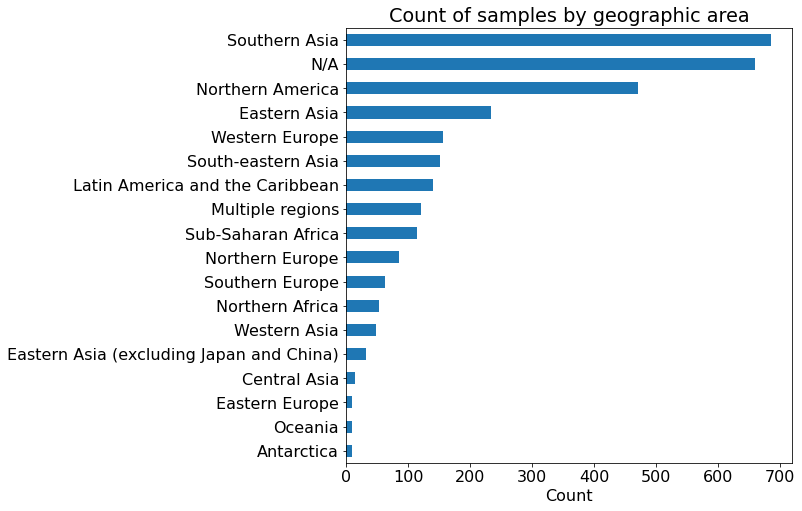

In [50]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

data.main_df['geo_area_name_standard'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))
plt.xlabel('Count')
plt.title('Count of samples by geographic area')

Awesome :). You can now generate your own figures from the CARD:Live Dashboard data.

In the CARD:Live Dashboard I make use [plotly](https://plotly.com/python/) instead of matplotlib for generating figures. The code for generating the dashboard figures is found in the [figures.py](https://github.com/arpcard/card-live-dashboard/blob/main/card_live_dashboard/layouts/figures.py) file in the code.